<h2 style="color:#4682B4">Data Cleaning and Preprocessing</h2>



<div style="border-top: 3px solid black"></div>


<h3 style="color:#4682B4">Importing libraries</h3>


In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# handling dates and times
import datetime

# to do mathematical computations
import math

# a library for visualizing missing data can be very helpful when trying to understand the 'shape' of missing data.
import missingno as msno

# used for regular expressions, which can be very useful when cleaning text data
import re

# scikit-learn has a number of preprocessing functions that can scaling and normalizing data or encoding categorical variables
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder


# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>


<div style="border-top: 3px solid black"></div>


<h3 style="color:#4682B4">Loading dataset(s)</h3>


In [2]:
import pandas as pd

# Load the csv files
orders = pd.read_csv('C:/Users/steve/Documents/SuperStore_Project_2023/Superstore_Project_2023/data/orders.csv')
returns = pd.read_csv('C:/Users/steve/Documents/SuperStore_Project_2023/Superstore_Project_2023/data/returns.csv')

# Left Merge the dataframes to include all orders (whether or not tehy have a return
# This will include all rows from the orders dataframe and the matching rows from the returns dataframe. 
# If there is no match, the result is NaN in the columns of the returns dataframe.
df = pd.merge(orders, returns, on='order_id', how='left')


# f-string
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.") 


There are 24061 rows and 38 columns.


<IPython.core.display.Javascript object>

<div style="border-top: 3px solid black"></div>


<h3 style="color:#4682B4">Display a sample of the dataframe</h3>


In [3]:
# Create a copy of the data
data = df.copy()

# View a sample of 10 data objects
np.random.seed(1)  # Obtain the same random results every time
data.sample(n=10)

,order_id,order_info_id,order_id_number,order_date,order_weekday,order_month,ship_date,ship_mode,product_id,category,sub_category,product_name,unit_cost,sales,profit,profit_margin,quantity,discount,discount_over_30,region_id,postal_code,city,state,sub_region,salesperson,customer_id,customer_name,segment,return_date,Category,Sales,Profit,Profit Margin,Margin Category,State,Customer Name,return_quantity,reason_returned
9513,ID-2019-3822244,ID-2019,3822244,2019-06-15,Saturday,June,2019-06-15,Second Class,OFF-BI-10002446,Office Supplies,Binders,"Wilson Jones Binder, Economy",7.81,7.81,0.10,0.012804,1,0.15,0,1488,48104,Ann Arbor,Michigan,Central United States,Annelise Williams,JH-15430,Jennifer Halladay,Consumer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9742,ID-2019-4558193,ID-2019,4558193,2019-07-01,Monday,July,2019-07-05,Standard Class,TEC-CO-10003102,Technology,Copiers,"Canon Copy Machine, Color",158.15,1961.04,0.43,0.000219,8,0.50,1,1488,78745,Austin,Texas,Central United States,Annelise Williams,TT-21460,Tonja Turnell,Home Office,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6685,ES-2019-3791943,ES-2019,3791943,2019-06-11,Tuesday,June,2019-06-11,Same Day,OFF-LA-10004737,Office Supplies,Labels,"Avery Shipping Labels, 5000 Label Set",12.24,36.72,0.19,0.005174,3,0.25,0,1488,55407,Minneapolis,Minnesota,Central United States,Annelise Williams,BD-11770,Bryan Davis,Consumer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8725,ID-2019-1199603,ID-2019,1199603,2019-09-17,Tuesday,September,2019-09-19,Same Day,OFF-PA-10004946,Office Supplies,Paper,"SanDisk Note Cards, Multicolor",33.96,36.00,0.24,0.006667,2,0.30,1,1488,60653,Chicago,Illinois,Central United States,Annelise Williams,NL-18310,Nancy Lomonaco,Home Office,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15069,IT-2019-582237,IT-2019,582237,2019-05-27,Monday,May,2019-05-28,Second Class,OFF-BI-10001984,Office Supplies,Binders,"Ibico Binding Machine, Economy",51.42,154.26,0.29,0.001880,3,0.35,1,1488,78207,San Antonio,Texas,Central United States,Annelise Williams,AM-10360,Alice McCarthy,Corporate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11887,IN-2019-3414263,IN-2019,3414263,2019-11-26,Tuesday,November,2019-11-30,Second Class,OFF-BI-10002424,Office Supplies,Binders,"Avery Binder, Economy",12.90,34.83,0.10,0.002871,3,0.15,0,1488,78207,San Antonio,Texas,Central United States,Annelise Williams,EJ-13720,Ed Jacobs,Consumer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13588,IN-2019-609649,IN-2019,609649,2019-11-04,Monday,November,2019-11-04,Second Class,OFF-BI-10002446,Office Supplies,Binders,"Wilson Jones Binder, Economy",7.81,91.14,0.29,0.003182,7,0.35,1,1488,61107,Rockford,Illinois,Central United States,Annelise Williams,JO-15550,Jesus Ocampo,Home Office,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3672,CA-2019-5436242,CA-2019,5436242,2019-09-28,Saturday,September,2019-10-03,Standard Class,OFF-AR-10000940,Office Supplies,Art,Newell 343,2.35,8.82,0.29,0.032880,3,0.35,1,1488,68104,Omaha,Nebraska,Central United States,Annelise Williams,SH-19975,Sally Hughsby,Corporate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17084,MX-2019-2806606,MX-2019,2806606,2019-06-18,Tuesday,June,2019-06-20,Same Day,OFF-SU-10001722,Office Supplies,Supplies,"Stiletto Box Cutter, Easy Grip",25.06,15.04,0.05,0.003324,1,0.10,0,1488,78745,Austin,Texas,Central United States,Annelise Williams,KC-16255,Karen Carlisle,Corporate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10946,IN-2019-2017026,IN-2019,2017026,2019-09-10,Tuesday,September,2019-09-12,Same Day,OFF-LA-10000471,Office Supplies,Labels,"Smead Shipping Labels, 5000 Label Set",10.80,84.00,0.19,0.002262,7,0.25,0,1488,48185,Westland,Michigan,Central United States,Annelise Williams,SC-20380,Shahid Collister,Consumer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>


<div style="border-top: 3px solid black"></div>


<h3 style="color:#4682B4">The following analysis supports the idea of analyzing the orders dataset and returns dataset separately, because only a small fraction of orders (those that were returned) have corresponding entries in both datasets.</h3>

<h4 style="color:#FFA500">OBSERVATION</h4>

##### The NaN in the returns dataset means that there are some returned orders for which the category is not recorded in the returns dataset.
##### The NaN in the returns dataset means that there are some returned orders for which the category is not recorded in the returns dataset.
##### The results indicate that there are 1211 rows where the 'category' column from the orders dataset matches the 'Category' column from the returns dataset. 
##### Conversely, there are 22850 rows where these two columns do not match.
##### This suggests that there are 1211 orders that have been returned, which aligns with the number of rows in the returns dataset. 
##### The remaining 22850 orders have not been returned, which is why there's no match in the 'Category' column from the returns dataset 
##### (those cells are filled with NaN values after the left join operation).
##### This analysis is very similar to the one done with the 'category' and '


In [4]:
print("Unique values in 'category' column from orders dataset:")
print(df['category'].unique())
print("\nUnique values in 'Category' column from returns dataset:")
print(df['Category'].unique())


Unique values in 'category' column from orders dataset:
['Technology' 'Office Supplies' 'Furniture']

Unique values in 'Category' column from returns dataset:
[nan 'Office Supplies' 'Furniture' 'Technology']


<IPython.core.display.Javascript object>

In [5]:
df["category_match"] = np.where(df["category"] == df["Category"], "True", "False")
print(df["category_match"].value_counts())
print("\n")

df['category_match_2'] = df['category'] == df['Category']
print(df['category_match_2'].value_counts())



False    22850
True      1211
Name: category_match, dtype: int64


False    22850
True      1211
Name: category_match_2, dtype: int64


<IPython.core.display.Javascript object>

In [6]:
print("Unique values in 'sales' column from orders dataset:")
print(df["sales"].unique())
print("\nUnique values in 'Sales' column from returns dataset:")
print(df["Sales"].unique())
print("\n")


df["sales_match"] = np.where(df["sales"] == df["Sales"], "True", "False")
print(df["sales_match"].value_counts())
print("\n")
df["sales_match"] = np.where(
    np.isclose(df["sales"], df["Sales"], atol=0.01), "True", "False"
)
print(df["sales_match"].value_counts())

Unique values in 'sales' column from orders dataset:
[ 95.8    3.43  42.48 ... 627.23  14.83   3.15]

Unique values in 'Sales' column from returns dataset:
[        nan 7.72600e+01 1.30320e+02 9.28800e+01 3.28140e+02 2.74680e+02
 1.47000e+01 2.79900e+02 1.07420e+02 2.95060e+02 3.37200e+01 3.30400e+01
 9.94000e+00 4.41617e+03 3.23500e+01 2.79200e+01 1.41000e+00 4.38600e+01
 1.94400e+01 3.95800e+01 5.45850e+02 4.74950e+02 1.32700e+01 4.66374e+03
 3.50000e+01 1.99800e+02 2.75000e+01 1.01840e+02 3.08400e+01 8.24950e+02
 1.52656e+03 1.63314e+03 3.69600e+01 9.41000e+00 1.59200e+01 1.43400e+01
 1.33600e+01 1.65200e+01 1.98720e+02 8.96000e+00 8.02800e+01 1.13900e+01
 2.44500e+01 1.86900e+01 3.27000e+01 3.81600e+01 1.22710e+02 1.99000e+01
 6.49600e+01 5.55800e+01 1.13940e+02 1.53600e+02 5.69800e+01 2.11200e+01
 4.78240e+02 3.23600e+01 2.21160e+02 1.44000e+01 5.20000e+01 3.00000e+01
 3.42400e+01 4.99170e+02 1.95960e+02 8.59200e+02 2.12400e+01 7.54000e+00
 3.07780e+02 1.34700e+01 1.58669e+03 1.49

<IPython.core.display.Javascript object>


<div style="border-top: 3px solid black"></div>


<h3 style="color:#4682B4">Display information about both the orders dataframe and the returns dataframe</h3>


In [7]:
print("Orders DataFrame Info:")
print("----------------------")
orders.info()

Orders DataFrame Info:
----------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24059 entries, 0 to 24058
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          24059 non-null  object 
 1   order_info_id     24059 non-null  object 
 2   order_id_number   24059 non-null  int64  
 3   order_date        24059 non-null  object 
 4   order_weekday     24059 non-null  object 
 5   order_month       24059 non-null  object 
 6   ship_date         24059 non-null  object 
 7   ship_mode         24059 non-null  object 
 8   product_id        24059 non-null  object 
 9   category          24059 non-null  object 
 10  sub_category      24059 non-null  object 
 11  product_name      24059 non-null  object 
 12  unit_cost         24059 non-null  float64
 13  sales             24059 non-null  float64
 14  profit            24059 non-null  float64
 15  profit_margin     24059 non-null  float64

<IPython.core.display.Javascript object>

In [8]:
print("\nReturns DataFrame Info:")
print("-----------------------")
returns.info()


Returns DataFrame Info:
-----------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   order_id         1209 non-null   object 
 1   return_date      1209 non-null   object 
 2   Category         1209 non-null   object 
 3   Sales            1209 non-null   float64
 4   Profit           1209 non-null   float64
 5   Profit Margin    1209 non-null   float64
 6   Margin Category  1209 non-null   object 
 7   State            1209 non-null   object 
 8   Customer Name    1209 non-null   object 
 9   return_quantity  1209 non-null   int64  
 10  reason_returned  1209 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 104.0+ KB


<IPython.core.display.Javascript object>


<div style="border-top: 3px solid black"></div>


<h3 style="color:blue">Check for duplicate records</h3>

<hr>

<h4 style="color:orange">OBSERVATION</h4>

Order ID # CA-2019-117947 was a duplicate record that needed to be deleted


In [9]:
duplicates = pd.DataFrame(
    {
        "Orders Duplicates": [orders.duplicated().sum()],
        "Returns Duplicates": [returns.duplicated().sum()],
    }
)

display(duplicates.style.hide_index())

Orders Duplicates,Returns Duplicates
0,1


<IPython.core.display.Javascript object>

In [10]:
# Identify and inspect all duplicates in the returns dataset
duplicates = returns[returns.duplicated(keep=False)]

# Display duplicates
print(duplicates)


         order_id return_date   Category  Sales  Profit  Profit Margin  \
7  CA-2019-117947  2019-09-11  Furniture   9.94    3.08       0.309859   
8  CA-2019-117947  2019-09-11  Furniture   9.94    3.08       0.309859   

  Margin Category  State Customer Name  return_quantity reason_returned  
7          Medium  Texas    Nat Gilpin                1      Not Needed  
8          Medium  Texas    Nat Gilpin                1      Not Needed  


<IPython.core.display.Javascript object>

In [11]:
# Drop duplicates from the returns dataset
returns = returns.drop_duplicates()

# Verify the operation by checking duplicates again
print("Number of duplicates after deletion: ", returns.duplicated().sum())


Number of duplicates after deletion:  0


<IPython.core.display.Javascript object>

In [12]:
duplicates = pd.DataFrame(
    {
        "Orders Duplicates": [orders.duplicated().sum()],
        "Returns Duplicates": [returns.duplicated().sum()],
    }
)

display(duplicates.style.hide_index())

Orders Duplicates,Returns Duplicates
0,0


<IPython.core.display.Javascript object>

In [13]:
# Verify returns.info()
print("\nReturns DataFrame Info:")
print("-----------------------")
returns.info()


Returns DataFrame Info:
-----------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1208 entries, 0 to 1208
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   order_id         1208 non-null   object 
 1   return_date      1208 non-null   object 
 2   Category         1208 non-null   object 
 3   Sales            1208 non-null   float64
 4   Profit           1208 non-null   float64
 5   Profit Margin    1208 non-null   float64
 6   Margin Category  1208 non-null   object 
 7   State            1208 non-null   object 
 8   Customer Name    1208 non-null   object 
 9   return_quantity  1208 non-null   int64  
 10  reason_returned  1208 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 113.2+ KB


<IPython.core.display.Javascript object>

<div style="border-top: 3px solid black"></div>


<h3 style="color:#4682B4">Display a sample of the orders dataframe</h3>


In [14]:
orders.head()

,order_id,order_info_id,order_id_number,order_date,order_weekday,order_month,ship_date,ship_mode,product_id,category,sub_category,product_name,unit_cost,sales,profit,profit_margin,quantity,discount,discount_over_30,region_id,postal_code,city,state,sub_region,salesperson,customer_id,customer_name,segment
0,AE-2019-1231682,AE-2019,1231682,2019-12-18,Wednesday,December,2019-12-23,Second Class,TEC-MOT-10001535,Technology,Phones,"Motorola Headset, VoIP",23.95,95.80,0.33,0.003445,4,0.40,1,1488,47374,Richmond,Indiana,Central United States,Annelise Williams,GH-4665,Greg Hansen,Consumer
1,AE-2019-1263608,AE-2019,1263608,2019-12-26,Thursday,December,2019-12-31,Second Class,OFF-AVE-10004827,Office Supplies,Binders,"Avery Binder Covers, Recycled",11.43,3.43,0.33,0.096210,1,0.40,1,1488,78745,Austin,Texas,Central United States,Annelise Williams,GH-4665,Greg Hansen,Consumer
2,AE-2019-303016,AE-2019,303016,2019-12-18,Wednesday,December,2019-12-23,Second Class,TEC-MOT-10001535,Technology,Phones,"Motorola Headset, VoIP",23.95,95.80,0.33,0.003445,4,0.40,1,1488,52402,Cedar Rapids,Iowa,Central United States,Annelise Williams,GH-4665,Greg Hansen,Consumer
3,AE-2019-304471,AE-2019,304471,2019-12-27,Friday,December,2019-12-31,Second Class,TEC-MOT-10001535,Technology,Phones,"Motorola Headset, VoIP",23.95,95.80,0.33,0.003445,4,0.40,1,1488,60653,Chicago,Illinois,Central United States,Annelise Williams,GH-4665,Greg Hansen,Consumer
4,AE-2019-3123605,AE-2019,3123605,2019-11-30,Saturday,November,2019-12-05,Second Class,OFF-ROG-10001340,Office Supplies,Storage,"Rogers File Cart, Industrial",141.60,42.48,0.28,0.006591,1,0.35,1,1488,55901,Rochester,Minnesota,Central United States,Annelise Williams,PG-8820,Patrick Gardner,Consumer


<IPython.core.display.Javascript object>

In [15]:
# Are dates in a string format?
print(orders['order_date'].head())
print(orders['ship_date'].head())


0    2019-12-18
1    2019-12-26
2    2019-12-18
3    2019-12-27
4    2019-11-30
Name: order_date, dtype: object
0    2019-12-23
1    2019-12-31
2    2019-12-23
3    2019-12-31
4    2019-12-05
Name: ship_date, dtype: object


<IPython.core.display.Javascript object>

In [16]:
# Convert dates to a datetime format
orders['order_date'] = pd.to_datetime(orders['order_date'])
orders['ship_date'] = pd.to_datetime(orders['ship_date'])


<IPython.core.display.Javascript object>

<div style="border-top: 3px solid black"></div>


<h3 style="color:#4682B4">Display a sample of the returns dataframe</h3>


In [17]:
returns.head()

,order_id,return_date,Category,Sales,Profit,Profit Margin,Margin Category,State,Customer Name,return_quantity,reason_returned
0,AE-2019-5740368,2020-01-06,Office Supplies,77.26,25.4958,0.33000,Medium,Illinois,Greg Hansen,1,Not Given
1,AG-2019-3960042,2019-04-24,Office Supplies,130.32,0.0000,0.00000,Medium,Indiana,Anemone Ratner,1,Not Given
2,AG-2019-553166,2020-01-04,Office Supplies,92.88,9.2880,0.10000,Medium,Michigan,Robert Dilbeck,1,Not Needed
3,AG-2019-5829085,2019-04-18,Office Supplies,130.32,0.0000,0.00000,Medium,Michigan,Anemone Ratner,1,Not Given
4,AG-2019-8240,2019-03-23,Office Supplies,130.32,51.8400,0.39779,Medium,Texas,Anemone Ratner,1,Not Given


<IPython.core.display.Javascript object>

<div style="border-top: 3px solid black"></div>

<h3 style="color:#4682B4">Dates to Datetime (as opposed to string format)</h3>


In [18]:
# Are dates in a string format?
print(returns['return_date'].head())


0    2020-01-06
1    2019-04-24
2    2020-01-04
3    2019-04-18
4    2019-03-23
Name: return_date, dtype: object


<IPython.core.display.Javascript object>

In [19]:
# Convert dates to a datetime format
returns["return_date"] = pd.to_datetime(returns["return_date"])

<IPython.core.display.Javascript object>

In [20]:
# Verification
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24059 entries, 0 to 24058
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          24059 non-null  object        
 1   order_info_id     24059 non-null  object        
 2   order_id_number   24059 non-null  int64         
 3   order_date        24059 non-null  datetime64[ns]
 4   order_weekday     24059 non-null  object        
 5   order_month       24059 non-null  object        
 6   ship_date         24059 non-null  datetime64[ns]
 7   ship_mode         24059 non-null  object        
 8   product_id        24059 non-null  object        
 9   category          24059 non-null  object        
 10  sub_category      24059 non-null  object        
 11  product_name      24059 non-null  object        
 12  unit_cost         24059 non-null  float64       
 13  sales             24059 non-null  float64       
 14  profit            2405

<IPython.core.display.Javascript object>

In [21]:
orders.shape

(24059, 28)

<IPython.core.display.Javascript object>

In [22]:
orders.dtypes.value_counts()


object            16
int64              5
float64            5
datetime64[ns]     2
dtype: int64

<IPython.core.display.Javascript object>

In [23]:
returns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1208 entries, 0 to 1208
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   order_id         1208 non-null   object        
 1   return_date      1208 non-null   datetime64[ns]
 2   Category         1208 non-null   object        
 3   Sales            1208 non-null   float64       
 4   Profit           1208 non-null   float64       
 5   Profit Margin    1208 non-null   float64       
 6   Margin Category  1208 non-null   object        
 7   State            1208 non-null   object        
 8   Customer Name    1208 non-null   object        
 9   return_quantity  1208 non-null   int64         
 10  reason_returned  1208 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 113.2+ KB


<IPython.core.display.Javascript object>

<div style="border-top: 3px solid black"></div>

<h3 style="color:#4682B4">Check for high cardinality (unique values per feature)</h3>


In [24]:
orders.nunique()


order_id            24022
order_info_id          84
order_id_number     23964
order_date            365
order_weekday           7
order_month            12
ship_date             371
ship_mode               4
product_id           6941
category                3
sub_category           17
product_name         3154
unit_cost            4247
sales                8631
profit                720
profit_margin       10711
quantity               14
discount               14
discount_over_30        2
region_id               1
postal_code           185
city                  172
state                  13
sub_region              1
salesperson             1
customer_id          1476
customer_name         794
segment                 3
dtype: int64

<IPython.core.display.Javascript object>

In [25]:
returns.nunique()


order_id           1208
return_date         353
Category              3
Sales               679
Profit              643
Profit Margin        50
Margin Category       2
State                13
Customer Name       448
return_quantity       3
reason_returned       4
dtype: int64

<IPython.core.display.Javascript object>

In [26]:
print(orders.isnull().any())
print(returns.isnull().any())
print("\n")
print("Number of total missing values in orders: ", orders.isnull().sum().sum())
print("Number of total missing values in returns: ", returns.isnull().sum().sum())


order_id            False
order_info_id       False
order_id_number     False
order_date          False
order_weekday       False
order_month         False
ship_date           False
ship_mode           False
product_id          False
category            False
sub_category        False
product_name        False
unit_cost           False
sales               False
profit              False
profit_margin       False
quantity            False
discount            False
discount_over_30    False
region_id           False
postal_code         False
city                False
state               False
sub_region          False
salesperson         False
customer_id         False
customer_name       False
segment             False
dtype: bool
order_id           False
return_date        False
Category           False
Sales              False
Profit             False
Profit Margin      False
Margin Category    False
State              False
Customer Name      False
return_quantity    False
reason_ret

<IPython.core.display.Javascript object>

In [27]:
orders.describe().round(2)

,order_id_number,unit_cost,sales,profit,profit_margin,quantity,discount,discount_over_30,region_id,postal_code
count,24059.00,24059.00,24059.00,24059.00,24059.00,24059.00,24059.00,24059.00,24059.0,24059.00
mean,2943373.90,72.36,248.11,0.97,0.01,3.46,0.26,0.47,1488.0,65215.19
std,1765288.92,116.15,502.41,38.73,0.28,2.29,0.14,0.50,0.0,11352.61
min,40.00,0.42,0.44,-3839.99,-2.75,1.00,0.00,0.00,1488.0,46060.00
25%,1411105.00,11.60,29.91,0.10,0.00,2.00,0.15,0.00,1488.0,55369.00
50%,2935473.00,29.49,83.88,0.19,0.00,3.00,0.25,0.00,1488.0,63122.00
75%,4480046.00,83.31,248.15,0.29,0.01,5.00,0.35,1.00,1488.0,77095.00
max,5994245.00,2799.99,13999.96,1439.45,41.25,14.00,0.65,1.00,1488.0,79907.00


<IPython.core.display.Javascript object>

In [28]:
returns.describe().round(2)

,Sales,Profit,Profit Margin,return_quantity
count,1208.00,1208.00,1208.00,1208.00
mean,458.29,119.77,0.20,1.05
std,737.96,238.30,0.16,0.23
min,1.41,-135.31,-1.65,1.00
25%,66.54,7.77,0.10,1.00
50%,168.72,25.04,0.20,1.00
75%,473.68,98.61,0.29,1.00
max,5729.35,1890.69,0.90,3.00


<IPython.core.display.Javascript object>

<div style="border-top: 3px solid black"></div>


<h3 style="color:blue">What are negative profits?</h3>

In [29]:
# Get the orders where the profit is negative
negative_profit_orders = orders[orders['profit'] < 0]

# Print the number of orders with negative profit
print("Number of orders with negative profit: ", len(negative_profit_orders))

# I could examine these orders in more detail, such as:
print(negative_profit_orders.head())


Number of orders with negative profit:  202
           order_id order_info_id  order_id_number order_date order_weekday  \
367  CA-2019-102610       CA-2019           102610 2019-11-05       Tuesday   
387  CA-2019-104864       CA-2019           104864 2019-11-19       Tuesday   
410  CA-2019-107832       CA-2019           107832 2019-11-24        Sunday   
425  CA-2019-109085       CA-2019           109085 2019-02-18        Monday   
492  CA-2019-117394       CA-2019           117394 2019-09-05      Thursday   

    order_month  ship_date       ship_mode       product_id         category  \
367    November 2019-11-09  Standard Class  OFF-BI-10004364  Office Supplies   
387    November 2019-11-24    Second Class  OFF-ST-10002301  Office Supplies   
410    November 2019-11-27    Second Class  OFF-BI-10001658  Office Supplies   
425    February 2019-02-21     First Class  FUR-CH-10003981        Furniture   
492   September 2019-09-11  Standard Class  TEC-AC-10000199       Technology   



<IPython.core.display.Javascript object>

<div style="border-top: 3px solid black"></div>

<h3 style="color:blue">Unique Count for Feature Levels</h3>

<hr>

<h4 style="color:orange">OBSERVATION</h4>

Segment: There are three unique segments (Consumer, Corporate, Home Office) in the dataset, representing different types of customers.

City and Postal_code: There are a lot of unique values here, which indicate a wide geographical coverage of the company's operations.

product_id: There are 6941 unique products sold, the most popular being "OFF-WIL-10001889" with 22 occurrences.

category: The items sold belong to three different categories: Office Supplies, Technology, and Furniture.

salesperson: The dataset only includes sales made by one salesperson, Annelise Williams.

customer_name: There are 794 unique customers, with the most frequent one being Delfina Latchford, who made 74 purchases.

order_id: There are 24022 unique orders, and some orders contain multiple products since the maximum count is 3.

sales: There is a wide range of sales amounts, with 12.96 being the most frequent sales amount.

profit: Profits also vary widely, with the most frequent profit being 0.19.

In [30]:
orders_features = set(orders.columns)

# Value Counts
for iterator in orders_features:
    print("The unique values in", iterator, "are:")
    print(orders[iterator].value_counts().sort_values(ascending=False))
    print("\n")
    print("=" * 40)
    print("\n")

returns_features = set(returns.columns)

# Value Counts
for iterator in returns_features:
    print("The unique values in", iterator, "are:")
    print(returns[iterator].value_counts().sort_values(ascending=False))
    print("\n")
    print("=" * 40)
    print("\n")


The unique values in category are:
Office Supplies    14756
Technology          4678
Furniture           4625
Name: category, dtype: int64




The unique values in discount_over_30 are:
0    12676
1    11383
Name: discount_over_30, dtype: int64




The unique values in profit_margin are:
0.000000    2612
0.014660      18
0.006460      15
0.010417      14
0.007576      14
            ... 
0.000862       1
0.000300       1
0.333032       1
0.000782       1
0.012771       1
Name: profit_margin, Length: 10711, dtype: int64




The unique values in order_id_number are:
7020       3
125164     3
45174      3
759037     2
5562457    2
          ..
308302     1
3486635    1
360684     1
3619577    1
959545     1
Name: order_id_number, Length: 23964, dtype: int64




The unique values in order_date are:
2019-12-03    141
2019-11-18    130
2019-11-13    129
2019-12-02    122
2019-11-30    121
             ... 
2019-02-09     28
2019-02-06     28
2019-02-21     27
2019-01-28     25
2019-02-26    

<IPython.core.display.Javascript object>

In [31]:
print(orders.columns)
print("\n")
print(returns.columns)

Index(['order_id', 'order_info_id', 'order_id_number', 'order_date',
       'order_weekday', 'order_month', 'ship_date', 'ship_mode', 'product_id',
       'category', 'sub_category', 'product_name', 'unit_cost', 'sales',
       'profit', 'profit_margin', 'quantity', 'discount', 'discount_over_30',
       'region_id', 'postal_code', 'city', 'state', 'sub_region',
       'salesperson', 'customer_id', 'customer_name', 'segment'],
      dtype='object')


Index(['order_id', 'return_date', 'Category', 'Sales', 'Profit',
       'Profit Margin', 'Margin Category', 'State', 'Customer Name',
       'return_quantity', 'reason_returned'],
      dtype='object')


<IPython.core.display.Javascript object>

<div style="border-top: 3px solid black">

<h3 style="color:blue">Count for order "quantity" (my chosen target variable for the orders dataframe)</h3>

<h3 style="color:blue">Count for return "quantity" (my chosen target variable for the returns dataframe)</h3>

In [32]:
import pandas as pd

# Getting counts for orders and returns
order_counts = orders["quantity"].value_counts(dropna=False)
return_reasons = returns["reason_returned"].value_counts(dropna=False)

# Concatenating the two series along columns
counts_df = pd.concat([order_counts, return_reasons], axis=1, keys=['Order Counts', 'Return Reasons'])

# Printing the counts
print(counts_df)
print("\n")

# Getting normalized counts for orders and returns
order_counts_normalized = orders["quantity"].value_counts(normalize=True) * 100
return_reasons_normalized = returns["reason_returned"].value_counts(normalize=True) * 100

# Concatenating the two series along columns
counts_normalized_df = pd.concat([order_counts_normalized, return_reasons_normalized], axis=1, keys=['Order Counts (%)', 'Return Reasons (%)'])

# Printing the normalized counts
print(counts_normalized_df)


             Order Counts  Return Reasons
2                  5979.0             NaN
1                  4399.0             NaN
3                  4366.0             NaN
4                  2947.0             NaN
5                  2336.0             NaN
6                  1385.0             NaN
7                  1133.0             NaN
8                   680.0             NaN
9                   440.0             NaN
10                  111.0             NaN
14                  101.0             NaN
11                   77.0             NaN
12                   71.0             NaN
13                   34.0             NaN
Not Given             NaN           432.0
Wrong Item            NaN           421.0
Wrong Color           NaN           190.0
Not Needed            NaN           165.0


             Order Counts (%)  Return Reasons (%)
2                   24.851407                 NaN
1                   18.284218                 NaN
3                   18.147055                 NaN


<IPython.core.display.Javascript object>

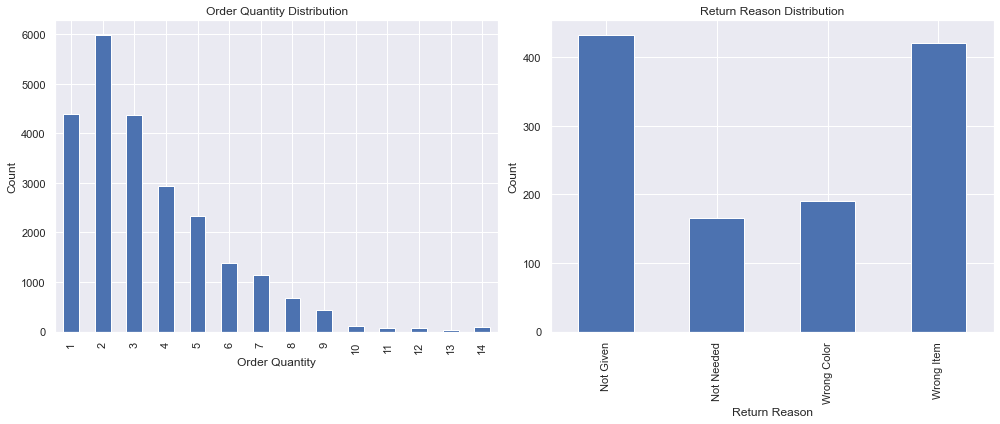

<IPython.core.display.Javascript object>

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Setting up the subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plotting the counts for orders
orders["quantity"].value_counts().sort_index().plot(ax=axes[0], kind='bar', title='Order Quantity Distribution')
axes[0].set_xlabel('Order Quantity')
axes[0].set_ylabel('Count')

# Plotting the counts for returns
returns["reason_returned"].value_counts().sort_index().plot(ax=axes[1], kind='bar', title='Return Reason Distribution')
axes[1].set_xlabel('Return Reason')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


<div style="border-top: 3px solid black"></div>

<h3 style="color:blue">Univariate Box Plots<br>Univariate Bar Plots<br>Categorical Bar Plots</h3>


In [34]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [35]:
def categorical_plot(data, feature, perc=True, figsize=(10, 5)):
    """
    Bar plot for categorical data

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (10,5))
    """
    plt.figure(figsize=figsize)
    
    # Find the order of categories based on their counts
    order = data[feature].value_counts().index
    
    ax = sns.countplot(data=data, x=feature, palette='Paired', order=order)
    plt.title('Bar plot for ' + feature)
    
    # Set the rotation of the x-axis labels
    plt.xticks(rotation=45)

    # Total number of data points
    total = float(len(data))
    for p in ax.patches:
        if perc:
            label = "{:.1f}%".format(100 * p.get_height() / total)
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_height()
        ax.annotate(label, (x, y), size = 12)
    
    plt.show()


<IPython.core.display.Javascript object>

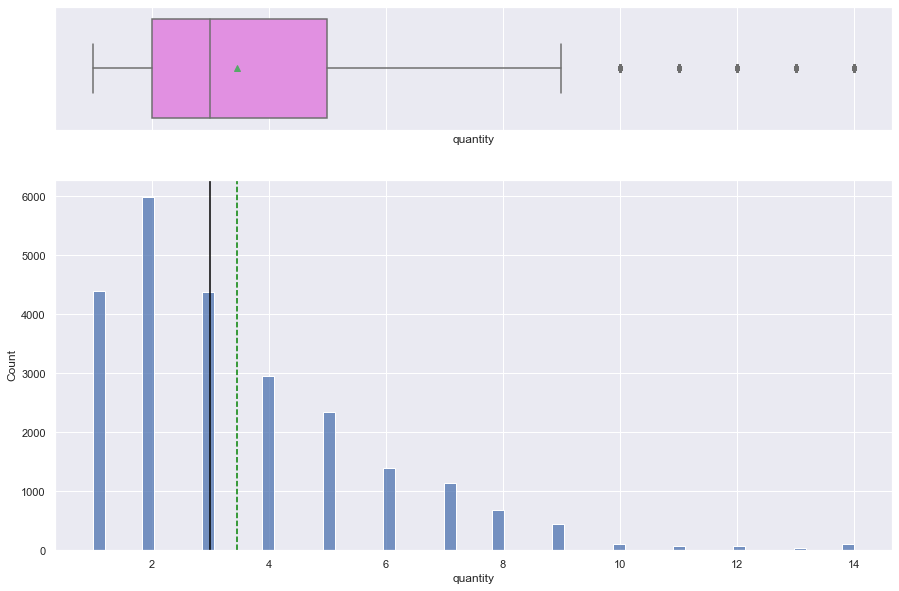

<IPython.core.display.Javascript object>

In [36]:
histogram_boxplot(orders, "quantity")

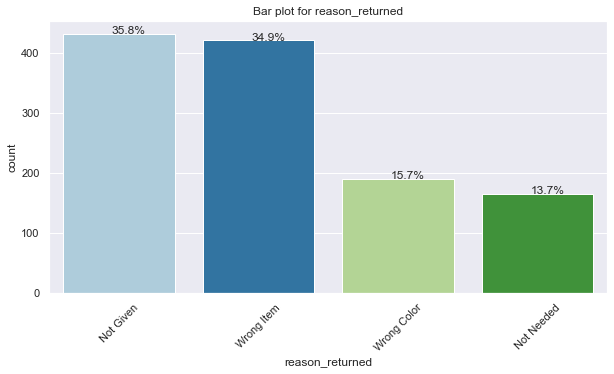

<IPython.core.display.Javascript object>

In [37]:
categorical_plot(returns, "reason_returned")

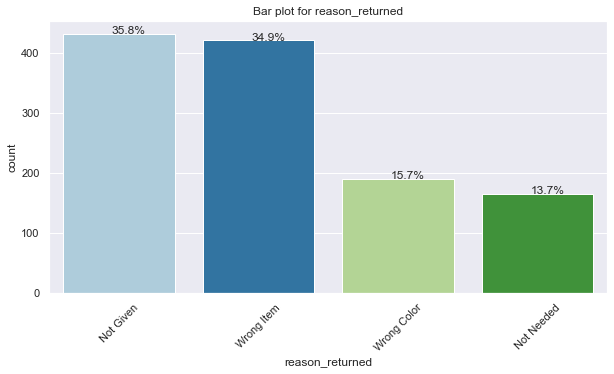

<IPython.core.display.Javascript object>

In [38]:
categorical_plot(returns, "reason_returned", perc=True)

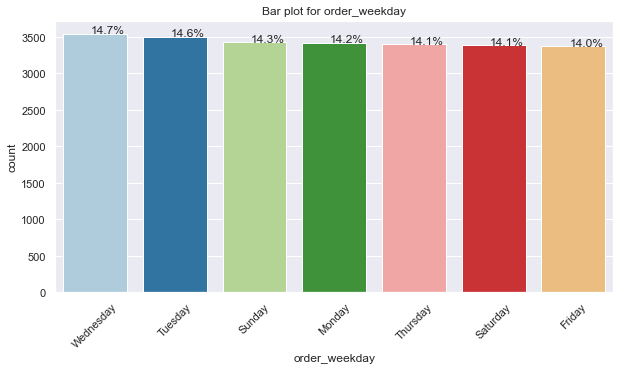

<IPython.core.display.Javascript object>

In [39]:
categorical_plot(orders, "order_weekday")

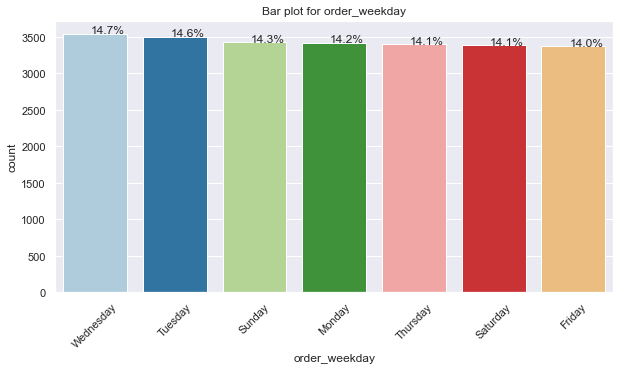

<IPython.core.display.Javascript object>

In [40]:
categorical_plot(orders, "order_weekday", perc=True)

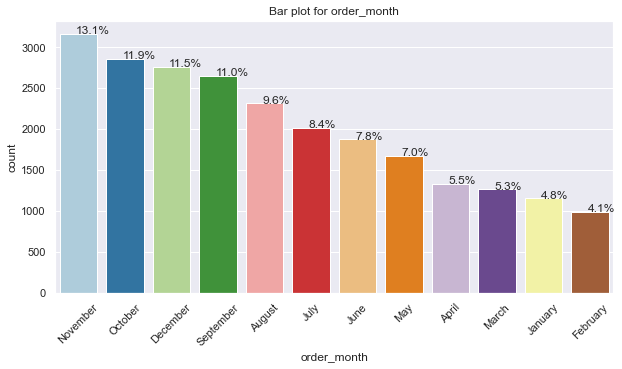

<IPython.core.display.Javascript object>

In [41]:
categorical_plot(orders, "order_month")

In [42]:
<div style="border-top: 3px solid black"></div>

SyntaxError: invalid syntax (3476746516.py, line 1)

ERROR:root:Cannot parse: 1:0: <div style="border-top: 3px solid black"></div>
Traceback (most recent call last):
  File "C:\Users\steve\anaconda3\lib\site-packages\lab_black.py", line 218, in format_cell
    formatted_code = _format_code(cell)
  File "C:\Users\steve\anaconda3\lib\site-packages\lab_black.py", line 29, in _format_code
    return format_str(src_contents=code, mode=FileMode())
  File "C:\Users\steve\anaconda3\lib\site-packages\black\__init__.py", line 1154, in format_str
    dst_contents = _format_str_once(src_contents, mode=mode)
  File "C:\Users\steve\anaconda3\lib\site-packages\black\__init__.py", line 1164, in _format_str_once
    src_node = lib2to3_parse(src_contents.lstrip(), mode.target_versions)
  File "C:\Users\steve\anaconda3\lib\site-packages\black\parsing.py", line 128, in lib2to3_parse
    raise exc from None
black.parsing.InvalidInput: Cannot parse: 1:0: <div style="border-top: 3px solid black"></div>


In [ ]:
# ==========================================
# ONLY RUN THIS FUNCTION ON A COPY OF THE DF
# This function will change the origianl df
# ==========================================
def categorical_plot_specific_order_but_this_changes_df(
    data, feature, categories=None, perc=True, figsize=(10, 5)
):
    """
    Bar plot for categorical data

    data: dataframe
    feature: dataframe column
    categories: order of categories (default None)
    figsize: size of figure (default (10,5))
    """
    plt.figure(figsize=figsize)

    # If a specific category order is provided, the data is adjusted accordingly
    if categories:
        data[feature] = pd.Categorical(
            data[feature], categories=categories, ordered=True
        )

    ax = sns.countplot(
        data=data, x=feature, palette="Paired", order=categories
    )  # Capture the axes of the plot here
    plt.title("Bar plot for " + feature)

    # Set the rotation of the x-axis labels
    plt.xticks(rotation=45)

    # Total number of data points
    total = float(len(data))
    for p in ax.patches:
        if perc:
            label = "{:.1f}%".format(100 * p.get_height() / total)
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_height()
        ax.annotate(label, (x, y), size=12)

    plt.show()


# Call function on a copy of df

orders_copy = orders.copy()


month_order = [
    "January",
    "February",
    "March",
    "April",
    "May",
    "June",
    "July",
    "August",
    "September",
    "October",
    "November",
    "December",
]

categorical_plot_specific_order_but_this_changes_df(
    orders_copy, "order_month", month_order
)

In [ ]:
categorical_plot(orders, "ship_mode")

In [ ]:
categorical_plot(orders, "category")

In [ ]:
categorical_plot(orders, "sub_category")

In [ ]:
categorical_plot(returns, "Category")

In [ ]:
categorical_plot(returns, "State")

In [ ]:
categorical_plot(returns, "State", perc=False)

<div style="border-top: 3px solid black"></div>

<h3 style="color:blue">Estimator of the Cumulative Distribution Function</h3>

<hr>

<h4 style="color:orange">OBSERVATION</h4>

<p style="font-size:15px">
Here are some example questions that a general audience might be able to answer by looking at each plot:

<ol>
<li><b>Sales Plot:</b> "What percentage of orders with a discount over 30 have total sales less than a specific dollar amount, compared to orders with a discount under 30?"
This plot could help the audience understand how offering a discount over 30 affects the total sales of an order. They could look at a specific dollar amount on the x-axis and compare the corresponding cumulative percentage (y-axis value) for both groups (Discount Over 30 vs Discount Under 30) to see the difference.</li>

<li><b>Profit Plot:</b> "At what profit value do we see that 50% of orders with a discount over 30 have less than that amount, and how does this compare to orders with a discount under 30?"
This plot can help the audience understand how the profit generated from orders varies based on whether a discount over 30 is offered. They could look for the 0.5 value on the y-axis and compare the corresponding profit values (x-axis value) for both groups.</li>

<li><b>Quantity Plot:</b> "For orders with a discount over 30, what quantity of product is typically ordered, and how does this compare to orders with a discount under 30?"
This plot can help the audience understand how the quantity of products ordered in a single order might be affected by whether a discount over 30 is offered. They can compare the distributions of both groups to see if there's a noticeable difference.</li>

<li><b>Unit Cost Plot:</b> "What's the maximum unit cost for 90% of orders with a discount over 30, and how does this compare to orders with a discount under 30?"
This plot can help the audience understand how the unit cost of products in orders might be affected by whether a discount over 30 is offered. They could look for the 0.9 value on the y-axis and compare the corresponding unit cost values (x-axis value) for both groups.</li>
</ol>
</p>


In [ ]:
# compare the distribution of sales when discount_over_30 is 0 or 1. I can do it like this:
# In this code, for the sales feature, it plots two ECDFs - one for the orders which had discount under 30 and 
# one for those which had discount over 30. The x-axis represents the sales and the y-axis represents the 
# cumulative probability.
# can replace sales with any other numeric column of my dataframe to compare their distributions under the 
# two different conditions of discount_over_30.


# visually compare the distributions of the feature for two subsets of the data.
# calculates the ECDF for a given array-like object (such as a pandas Series or a numpy array). 
# It sorts the values in ascending order and assigns a rank to each value that represents the 
# proportion of values that are less than or equal to the current value.
# In the loop provided, it computes the ECDF for two subsets of the data for each specified feature and 
# plots them on the same graph. 

# continuous numeric variables that I could consider for an ECDF plot could be 'profit', 'quantity', or 'unit_cost'. 
# These could provide insights into how these metrics differ between orders with 
# a discount over 30 and those with a discount under 30.

def ecdf(df_arr):
    # number of data points
    n = len(df_arr)
    xvals = np.sort(df_arr)
    yvals = np.arange(1, n + 1) / n
    return xvals, yvals

# Assuming 'discount_over_30' is the column in 'orders' dataframe which indicates whether the discount is over 30 or not.
for var in ["sales", "profit", "quantity", "unit_cost"]:
    tmpx, tmpy = ecdf(orders.loc[orders["discount_over_30"] == 0, var])
    t1, t2 = ecdf(orders.loc[orders["discount_over_30"] == 1, var])
    _ = plt.plot(tmpx, tmpy, marker=".", linestyle="none", label="Discount Under 30")
    _ = plt.plot(t1, t2, marker=".", linestyle="none", label="Discount Over 30")
    _ = plt.legend(("Discount Under 30", "Discount Over 30"), loc="lower right")
    _ = plt.xlabel(var)
    _ = plt.ylabel("ECDF")
    plt.show()


<div style="border-top: 3px solid black"></div>

<h3 style="color:blue">Bivariate Pairwise Correlation Matrix</h3>

<hr>

<h4 style="color:orange">ORDERS OBSERVATIONS</h4>

<p style="font-size:15px">
Correlation measures how much two variables move in the same direction. It ranges from -1 to +1. these correlations only measure linear relationships. If the relationship between two variables is not linear, the correlation may not capture it well. Also, correlation does not imply causation. Just because two variables are correlated does not mean that one causes the other to change.

<ol>
<li><b>unit_cost and sales:</b>This correlation of 0.769833 means there's a strong positive correlation between unit cost and sales. As the unit cost increases, sales also tend to increase.</li>

<li><b>unit_cost and profit:</b>The correlation of -0.031696 means there's a very weak negative correlation between unit cost and profit. As the unit cost increases, the profit slightly tends to decrease. However, the relationship is weak, and there may be other factors at play.</li>

<li><b>List sales and profit:</b> The correlation of -0.021154 is also a weak negative correlation. It indicates that as sales increase, profit slightly tends to decrease, but again the relationship is weak.</li>

<li><b>profit and profit_margin:</b>The correlation of 0.170439 indicates a weak positive relationship. It means that as profit increases, the profit margin slightly tends to increase.</li>

<li><b>sales and quantity:</b>The correlation of 0.313308 indicates a moderate positive relationship. It means that as sales increase, the quantity also tends to increase.</li>
    
<li><b>unit_cost and discount:</b>The correlation of 0.269118 indicates a weak to moderate positive correlation. It suggests that when the unit cost increases, the discount also tends to increase.</li>

</ol>
</p>

&nbsp;

<h4 style="color:orange">RETURNS OBSERVATIONS</h4>

<p style="font-size:15px">
Correlation measures how much two variables move in the same direction. It ranges from -1 to +1. these correlations only measure linear relationships. If the relationship between two variables is not linear, the correlation may not capture it well. Also, correlation does not imply causation. Just because two variables are correlated does not mean that one causes the other to change.

<ol>
<li><b>Sales and Profit:</b>A correlation of 0.909738 shows a very strong positive correlation. This means that as sales increase, profit also tends to increase in your returns dataset.</li>

<li><b>Sales and Profit Margin:</b>A correlation of 0.235774 is a weak positive correlation. It suggests that as sales increase, the profit margin also tends to increase, but not as strongly as the relationship between sales and profit.</li>

<li><b>Sales and return_quantity:</b> A correlation of 0.031543 is a very weak positive correlation. It suggests that as sales increase, the quantity of returns also slightly increases, but the relationship is quite weak.</li>

<li><b>Profit and Profit Margin:</b>A correlation of 0.404083 is a moderate positive correlation. It suggests that as profit increases, the profit margin also tends to increase.</li>

<li><b>Profit and return_quantity:</b>A correlation of 0.003126 is extremely weak, close to no correlation. It suggests that there is almost no linear relationship between profit and the quantity of returns.</li>
    
<li><b>Profit Margin and return_quantity:</b>A correlation of -0.070811 is a very weak negative correlation. It suggests that as the profit margin increases, the quantity of returns slightly decreases, but the relationship is very weak.</li>

</ol>
</p>


In [ ]:
orders_copy2 = orders.copy()
orders_copy2.drop(
    ["order_id_number", "discount_over_30", "region_id", "postal_code"],
    axis=1,
    inplace=True,
)

In [ ]:
orders_copy2.corr()

In [ ]:
plt.figure(figsize=(15, 7))
corr = orders_copy2.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral", mask=mask)
plt.show()

In [ ]:
returns_copy2 = returns.copy()
returns_copy2.corr()

In [ ]:
plt.figure(figsize=(15, 7))
corr = returns_copy2.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral", mask=mask)
plt.show()

<div style="border-top: 3px solid black"></div>

<h3 style="color:blue">BIVARIATE PAIRPLOTS</h3>

<hr>

<h4 style="color:orange">ORDERS OBSERVATIONS</h4>

<p style="font-size:15px">
Here is a list of bivariate paring observations:

<ol>
<li><b>sales and profits:</b>Orders with a discount over 30 tend to have higher sales and profit, as seen in the points for discount_over_30 = 1, which are generally higher on the sales vs profit plot.</li>

<li><b>Diagonal Plots::</b>The diagonal plots can show you whether certain values of a variable are more common for orders with a discount over 30. If higher sales values are more common when the discount is over 30, then the distribution would skewe towards the right for discount_over_30 = 1 on the sales vs sales plot.</li>

<li><b>List Item Three:</b> Sentence Three</li>

<li><b>List Item Four:</b>Sentence Four</li>
</ol>
</p>
&nbsp;
<h4 style="color:orange">RETURNS OBSERVATIONS</h4>

<p style="font-size:15px">
Here is a list of ....... looking at each plot:

<ol>
<li><b>Diagonal Plots:</b>The diagonal plots can show you the distribution of each variable. For instance, if most returns have a low 'Profit', the 'Profit' histogram would be skewed towards the right. The diagonal plots can show you the distribution of each variable. For instance, if most returns have a low 'Profit', the 'Profit' histogram would be skewed towards the right.</li>

<li><b>Sales vs. Profit:</b>If 'Sales' and 'Profit' generally increase together, the plot will display a positive correlation in their scatterplot: the points would approximately follow a line going up and to the right. </li>

<li><b>Sales vs return_quantity:</b>  look for unusual patterns or outliers that might warrant further investigation. For instance, if there's a cluster of points far away from the others in the 'Sales' vs 'return_quantity' plot, it could indicate a subset of returns with unusually high sales and return quantities.</li>

<li><b>Sales vs. Profit Margin:</b>If higher 'Sales' correspond with lower 'Profit Margin', you'd see a negative correlation: the points would follow a line going down and to the right.</li>
</ol>
</p>

In [ ]:
orders_copy3 = orders.copy()
orders_copy3.drop(
    ["order_id_number", "region_id", "postal_code"],
    axis=1,
    inplace=True,
)

sns.pairplot(data=orders_copy3, hue="discount_over_30")
plt.show()

In [ ]:
sns.pairplot(data=returns_copy2)
plt.show()

<div style="border-top: 3px solid black">

<h3 style="color:blue">Drop Unwanted Features</h3>

In [ ]:
orders_copy3.info()

In [ ]:
# First, ensure that 'ship_date' is in datetime format
orders_copy3['ship_date'] = pd.to_datetime(orders_copy3['ship_date'])

# Now, create the 'ship_weekday' column
orders_copy3['ship_weekday'] = orders_copy3['ship_date'].dt.day_name()

# And create the 'ship_month' column
orders_copy3['ship_month'] = orders_copy3['ship_date'].dt.month_name()


In [ ]:
orders_cleaned = orders_copy3.drop(["ship_date","product_name","city","customer_name","order_date", "order_id", "order_info_id", "product_id", "customer_id", "salesperson", "sub_region","sub_category"], axis=1)


In [ ]:
orders_cleaned.nunique()

In [ ]:
returns_copy2.info()

In [ ]:
returns_cleaned = returns_copy2.drop(["order_id", "Margin Category","return_date","Customer Name",], axis=1)


In [ ]:
returns_cleaned.nunique()

<div style="border-top: 3px solid black">

<h3 style="color:blue">Z-Score<br>Scaled Orders DataFrame<br>Scaled Orders DataFrame</h3>


In [ ]:
# Scaling the orders dataset before applying clustering algorithms
scaler = StandardScaler()
subset = .copy()
subset_scaled = scaler.fit_transform(subset)

# Creating a dataframe from the scaled data
orders_scaled = pd.DataFrame(subset_scaled, columns=orders_cleaned.columns)

In [ ]:
# Scaling the returns dataset before applying clustering algorithms
scaler = StandardScaler()
subset = .copy()
subset_scaled = scaler.fit_transform(subset)

# Creating a dataframe from the scaled data
returns_scaled = pd.DataFrame(subset_scaled, columns=returns_cleaned.columns)